Mean absolute error in test dataset using Linear Regression Model: 578.07


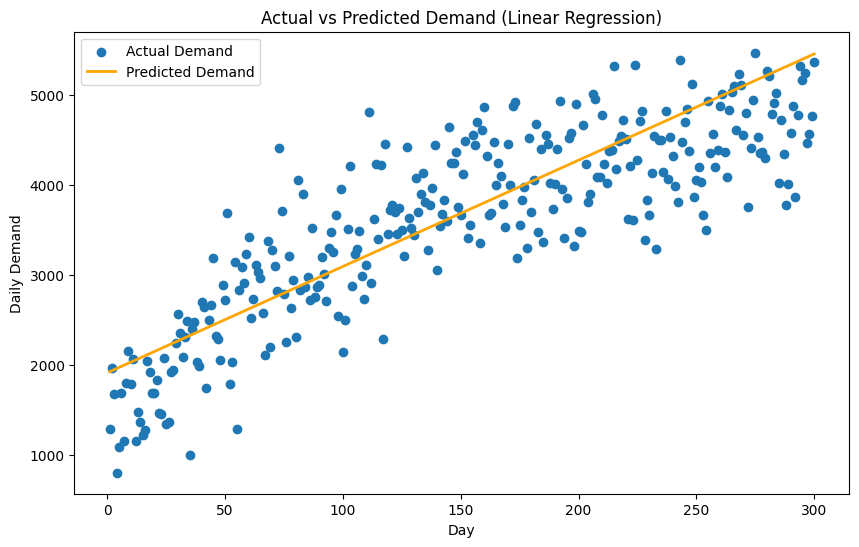

Epoch 1/2000


/Users/dineshbisht/masterdegree/myproject_env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8355 - mae: 0.7356 - val_loss: 0.9999 - val_mae: 0.8822
Epoch 2/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5301 - mae: 0.5843 - val_loss: 0.4419 - val_mae: 0.5472
Epoch 3/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3870 - mae: 0.4956 - val_loss: 0.2518 - val_mae: 0.4005
Epoch 4/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3174 - mae: 0.4503 - val_loss: 0.2935 - val_mae: 0.4346
Epoch 5/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.2913 - mae: 0.4300 - val_loss: 0.3225 - val_mae: 0.4598
Epoch 6/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.2791 - mae: 0.4213 - val_loss: 0.2792 - val_mae: 0.4232
Epoch 7/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.2712 - mae: 0.4155 - val_loss: 0.2613 - val_mae: 0.4074
Epoch 8/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.2627 - mae: 0.4100 - val_loss: 0.2539 - val_mae: 0.4015
Epoch 9/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss:

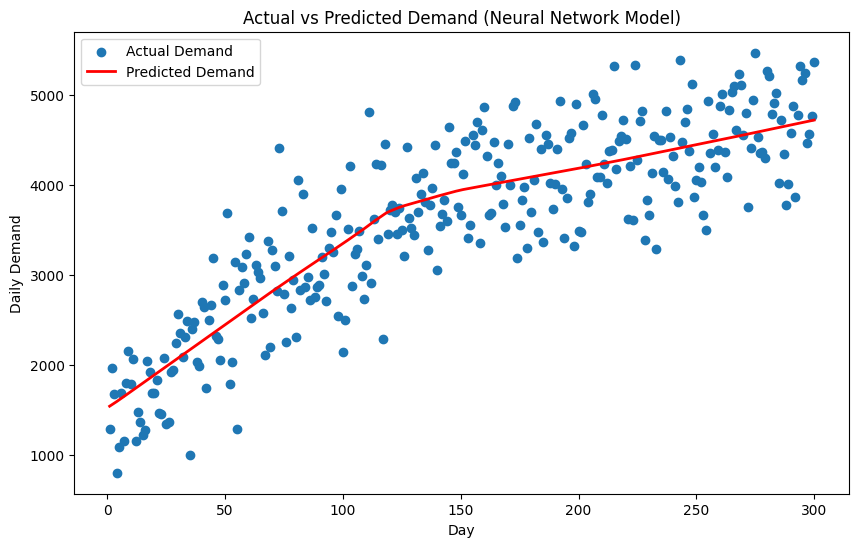

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CSV data into Pandas DataFrame
df = pd.read_csv("Demand.csv", sep=';')

# # Get basic information about data
# print(df.info())

# Split the data based on the 'Day' column
train_data = df[df['Day'] <= 250] # Days 1 to 250 for training
test_data = df[df['Day'] > 250] # Days 251 to 300 for testing

# Separate features (X) and target (y)
X_train = train_data[['Day']]
y_train = train_data[['Demand']]

X_test = test_data[['Day']]
y_test = test_data[['Demand']]

# Train the linear regression model on the training dataset
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Predict on test dataset
linreg_model_prediction_test = linreg_model.predict(X_test)

# Evaluate and display model accuracy with Mean Absolute Error for test dataset
print(f"Mean absolute error in test dataset using Linear Regression Model: {mean_absolute_error(y_test, linreg_model_prediction_test):.2f}")

# For plotting across entire (1–300) period
X_full = df[['Day']]
y_full = df['Demand']
linreg_pred_all = linreg_model.predict(X_full)

# Plot for Linear Regression Model (actual + predicted across entire period 1-300 Days)
plt.figure(figsize=(10, 6))
plt.scatter(df['Day'], y_full, label='Actual Demand')
plt.plot(df['Day'], linreg_pred_all, label='Predicted Demand', color='orange', linewidth=2)
plt.title("Actual vs Predicted Demand (Linear Regression)")
plt.xlabel("Day")
plt.ylabel("Daily Demand")
plt.legend()
plt.show()

# Scale both feature and response for Neural Network model
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the non-linear Neural Network Model on the training dataset
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(60, activation='relu',),
    tf.keras.layers.Dense(y_train_scaled.shape[1])
])

nn_model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=30, restore_best_weights=True
)

nn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    shuffle=False,
    epochs=2000,
    batch_size=10,
    callbacks=[early_stop],
#    verbose=0
)

# Predict on test dataset
nn_model_prediction_test = nn_model.predict(X_test_scaled)

# Inverse-transform the predictions
nn_model_prediction_test = scaler_y.inverse_transform(nn_model_prediction_test)

# Inverse-transform (restore original scale) of target
y_test = scaler_y.inverse_transform(y_test_scaled)

# Evaluate and display model accuracy with Mean Absolute Error for test dataset
print(f"Mean absolute error in test dataset using Neural Network Model: {mean_absolute_error(y_test, nn_model_prediction_test):.2f}")

# For plotting across entire (1–300) period
X_full_scaled = scaler_x.transform(X_full) # Scale the input
nn_model_pred_all = nn_model.predict(X_full_scaled)
nn_model_pred_all = scaler_y.inverse_transform(nn_model_pred_all) # inverse transform the reponse

# Plot for Neural Network Model (actual + predicted across entire period 1-300 Days)
plt.figure(figsize=(10, 6))
plt.scatter(df['Day'], y_full, label='Actual Demand')
plt.plot(df['Day'], nn_model_pred_all, label='Predicted Demand', color='red', linewidth=2)
plt.title("Actual vs Predicted Demand (Neural Network Model)")
plt.xlabel("Day")
plt.ylabel("Daily Demand")
plt.legend()
plt.show()
